## Guia da Camada Física
##### O documento tem o objetivo de demostrar o funcionamento da camada física, além de suas funções e ferramentas.

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random
Logger.activate(Logger)

##### Será instaciada a rede e definida a topologia de Grade

2024-09-11 16:33:00,954: Qubit 0 adicionado à memória do Host 0.
2024-09-11 16:33:00,955: Qubit 0 criado com fidelidade inicial 0.05287618235960767 e adicionado à memória do Host 0.
2024-09-11 16:33:00,956: Qubit 1 adicionado à memória do Host 0.
2024-09-11 16:33:00,956: Qubit 1 criado com fidelidade inicial 0.22883357794572756 e adicionado à memória do Host 0.
2024-09-11 16:33:00,957: Qubit 2 adicionado à memória do Host 0.
2024-09-11 16:33:00,957: Qubit 2 criado com fidelidade inicial 0.6823053755956179 e adicionado à memória do Host 0.
2024-09-11 16:33:00,958: Qubit 3 adicionado à memória do Host 0.
2024-09-11 16:33:00,959: Qubit 3 criado com fidelidade inicial 0.5971842103463942 e adicionado à memória do Host 0.
2024-09-11 16:33:00,961: Qubit 4 adicionado à memória do Host 0.
2024-09-11 16:33:00,962: Qubit 4 criado com fidelidade inicial 0.2452203852628302 e adicionado à memória do Host 0.
2024-09-11 16:33:00,962: Qubit 5 adicionado à memória do Host 0.
2024-09-11 16:33:00,963: Qub

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


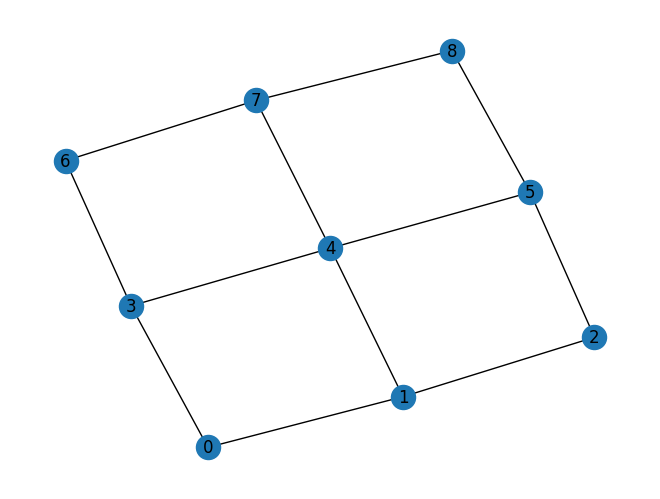

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

##### Selecionando aleatoriamente uma aresta do grafo da rede e deseguinando quem será Alice e Bob.

In [3]:
arestas = list(rede.edges)
aresta_aleatorias = random.sample(arestas, 1)[0]
x,y = aresta_aleatorias

alice = rede.get_host(x)
bob = rede.get_host(y)

##### Adicionando qubits aos hosts.

In [4]:
h1 = Qubit(1)
h2 = Qubit(2)

alice.add_qubit(h1)
bob.add_qubit(h2)

2024-09-11 16:33:02,134: Qubit 1 adicionado à memória do Host 3.
2024-09-11 16:33:02,136: Qubit 2 adicionado à memória do Host 4.


##### Acessando a memória dos Hosts.

In [5]:
print(alice.memory)
print(bob.memory)

[<quantumnet.objects.qubit.Qubit object at 0x701bb4d92b40>, <quantumnet.objects.qubit.Qubit object at 0x701bb7feb980>, <quantumnet.objects.qubit.Qubit object at 0x701bb4d93b00>, <quantumnet.objects.qubit.Qubit object at 0x701bb4d93c20>, <quantumnet.objects.qubit.Qubit object at 0x701bb4d93da0>, <quantumnet.objects.qubit.Qubit object at 0x701bb4d93e00>, <quantumnet.objects.qubit.Qubit object at 0x701bb4d93ec0>, <quantumnet.objects.qubit.Qubit object at 0x701bb4d93fe0>, <quantumnet.objects.qubit.Qubit object at 0x701bb5706510>, <quantumnet.objects.qubit.Qubit object at 0x701bbdf23b60>, <quantumnet.objects.qubit.Qubit object at 0x701bbc0e7920>]
[<quantumnet.objects.qubit.Qubit object at 0x701bb4d93920>, <quantumnet.objects.qubit.Qubit object at 0x701bb4d91970>, <quantumnet.objects.qubit.Qubit object at 0x701bb6b9c2c0>, <quantumnet.objects.qubit.Qubit object at 0x701bb4dac230>, <quantumnet.objects.qubit.Qubit object at 0x701bb4dac4d0>, <quantumnet.objects.qubit.Qubit object at 0x701bb4d4c6

##### Obtendo o útimo qubit de um dos hosts

In [6]:
qub1 = alice.get_last_qubit()


##### Medindo a fidelidade entre dois qubits


In [7]:
#Pode medir a fidelidade por meio dessa função
rede.physical.fidelity_measurement(h1,h2)

2024-09-11 16:33:02,935: A fidelidade entre o qubit Qubit 1 with state 0 e o qubit Qubit 2 with state 0 é 0.22194868328573997


0.22194868328573997

##### Medindo a fidelidade de um qubit


In [8]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)


2024-09-11 16:33:03,060: A fidelidade do qubit Qubit 1 with state 0 é 0.2732237373272288


0.2732237373272288

##### Criação do protocolo de entrelaçamento entre dois qubits

In [9]:
rede.physical.entanglement_creation_heralding_protocol(alice,bob)

2024-09-11 16:33:03,142: Timeslot 1: Par epr criado com fidelidade 0.28667771308130496
2024-09-11 16:33:03,144: Timeslot 2: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.


False

##### Realiza-se o primeiro protocolo, on demand, que através da fidelidade inicial e da probabilidade de sucesso do on demand determina o sucesso do ECHP

In [10]:
rede.physical.echp_on_demand(2,5)

2024-09-11 16:33:03,245: A fidelidade do qubit Qubit 29 with state 0 é 0.4574146188061935
2024-09-11 16:33:03,262: A fidelidade do qubit Qubit 59 with state 0 é 0.8385119802251536
2024-09-11 16:33:03,272: Timeslot 3: A probabilidade de sucesso do ECHP falhou.


False

##### Realiza-se, então, o segundo protocolo, on replay, que através da fidelidade inicial e da probabilidade de sucesso do on replay determina o sucesso do ECHP

In [11]:
rede.physical.echp_on_replay(2,5)

2024-09-11 16:33:03,358: A fidelidade do qubit Qubit 28 with state 0 é 0.09522728651148771
2024-09-11 16:33:03,362: A fidelidade do qubit Qubit 58 with state 0 é 0.7543142546736238
2024-09-11 16:33:03,370: Timeslot 4: A probabilidade de sucesso do ECHP falhou.


False

In [12]:
rede.get_total_useds_eprs()

2024-09-11 16:33:03,590: Eprs usados na camada PhysicalLayer: 1
2024-09-11 16:33:03,592: Eprs usados na camada LinkLayer: 0
2024-09-11 16:33:03,592: Eprs usados na camada NetworkLayer: 0


1

In [13]:
rede.get_total_useds_qubits()

2024-09-11 16:33:03,675: Qubits usados na camada PhysicalLayer: 6
2024-09-11 16:33:03,676: Qubits usados na camada LinkLayer: 0
2024-09-11 16:33:03,677: Qubits usados na camada TransportLayer: 0
2024-09-11 16:33:03,679: Qubits usados na camada ApplicationLayer: 0


6

##### Acessando o canal que mostra as probablidades e os pares eprs


In [14]:
rede.edges[2,5]

{'prob_on_demand_epr_create': 0.7360473193419637,
 'prob_replay_epr_create': 0.27608960532718135,
 'eprs': [<quantumnet.objects.epr.Epr at 0x701bb4de9010>,
  <quantumnet.objects.epr.Epr at 0x701bb61c1cd0>]}

##### Acessando o dicionario que contém os pares eprs alocados


In [15]:
rede.get_eprs()

{(0, 3): [<quantumnet.objects.epr.Epr at 0x701bb4daf9b0>,
 (0, 1): [<quantumnet.objects.epr.Epr at 0x701bb4dafa70>,
 (1, 4): [<quantumnet.objects.epr.Epr at 0x701bb4daffe0>,
 (1, 2): [<quantumnet.objects.epr.Epr at 0x701bb4de85f0>,
 (2, 5): [<quantumnet.objects.epr.Epr at 0x701bb4de9010>,
 (3, 6): [<quantumnet.objects.epr.Epr at 0x701bb4d92000>,
 (3, 4): [<quantumnet.objects.epr.Epr at 0x701bb4d920c0>,
 (4, 7): [<quantumnet.objects.epr.Epr at 0x701bb4dea4e0>,
 (4, 5): [<quantumnet.objects.epr.Epr at 0x701bb4deabd0>,
 (5, 8): [<quantumnet.objects.epr.Epr at 0x701bb4d93980>,
 (6, 7): [<quantumnet.objects.epr.Epr at 0x701bb4d936b0>,
 (7, 8): [<quantumnet.objects.epr.Epr at 0x701bb4dac5f0>,
  <quantumnet.objects.epr.Epr at 0x701bb4dfc8c0>]}

In [16]:
rede.get_timeslot()

4